Pixel data shape: (60000, 784)


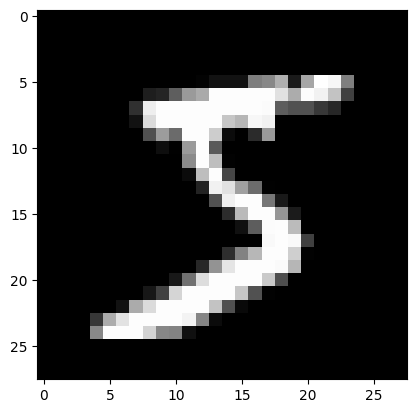

PVE for the first 10 principal components: [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001]
Sum of PVE for the first 10 principal components: 0.4881498038548513
Number of principal components needed to explain 70% of the data: 26


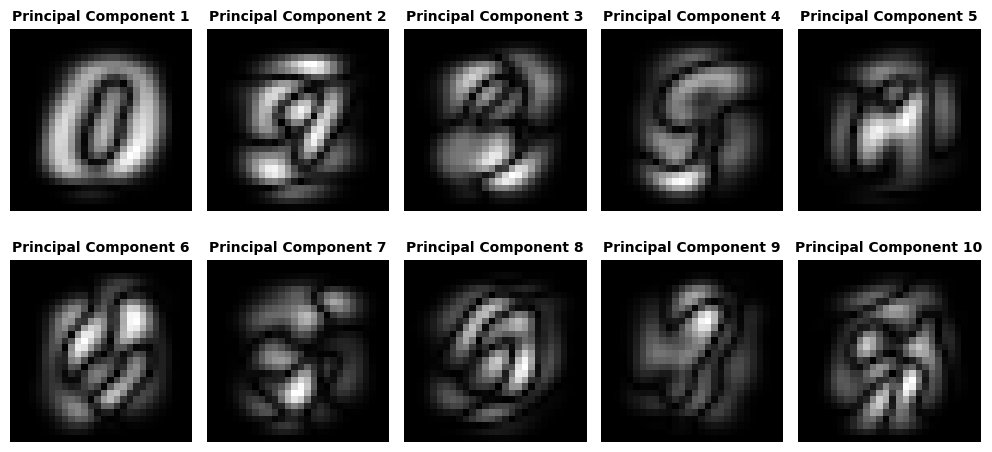

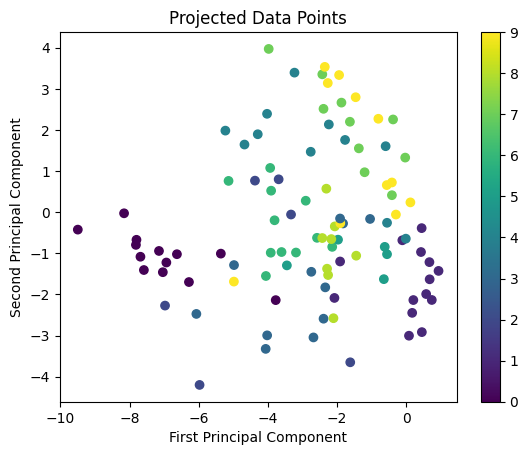

Number of colors: 10


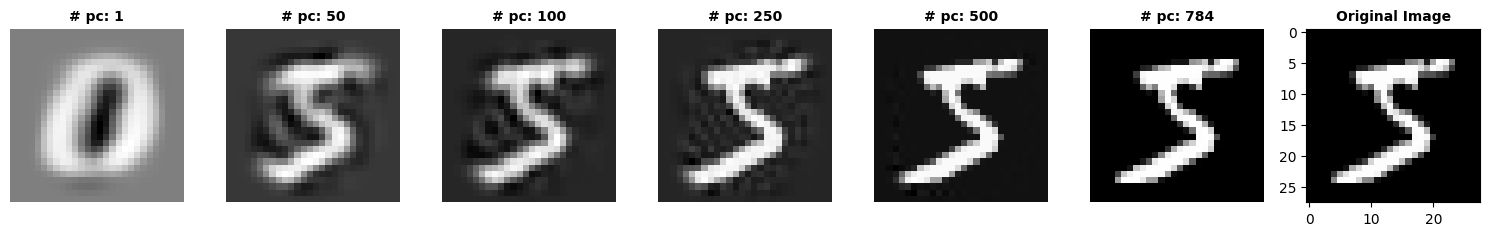

In [33]:
import numpy as np
import gzip

# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path) as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    # Flatten the normalized pixels
    flattened_pixels = normalized_pixels.reshape(-1, 28*28)
    return flattened_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path) as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    return label_data

images = read_pixels("data/train-images-idx3-ubyte.gz")
labels = read_labels("data/train-labels-idx1-ubyte.gz")

# visualize images
import matplotlib.pyplot as plt
plt.imshow(images[0].reshape(28,28), cmap='gray')
plt.show()

# Question 1.1 [15 pts] Apply PCA on the dataset to obtain the principal components. 
# Report the proportion of variance explained (PVE) for the first 10 principal components and discuss your results.
# Implement pca from scratch, can use numpy.linalg.eig
def pca(X):
    mean = np.mean(X, axis=0)

    X = X - mean

    cov_matrix = np.cov(X.T)

    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

    # sort the eigenvalues and eigenvectors
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]

    # the proportion of variance explained
    PVE = eigen_values / np.sum(eigen_values)

    return eigen_values, eigen_vectors, PVE

eigen_values, eigen_vectors, PVE = pca(images)

# finding the proportion of variance explained for the first 10 principal components
PVE_10 = PVE[:10]
print("PVE for the first 10 principal components:", PVE_10)

# sum of the proportion of variance explained for the first 10 principal components
sum_PVE_10 = np.sum(PVE_10)
print("Sum of PVE for the first 10 principal components:", sum_PVE_10)

# Question 1.2 [5 pts] Report at least how many of the principal components should be used to explain
# the 70% of the data.
PVE_70 = 0
for i in range(len(PVE)):
    PVE_70 += PVE[i]
    if PVE_70 >= 0.7:
        print("Number of principal components needed to explain 70% of the data:", i+1)
        break

# Question 1.3 [10 pts] Using the first 10 principal components found in Question 1.1, reshape each
# principal component to a 28 × 28 matrix. Apply min-max scaling to each principal component to set the
# range of the values to [0, 1] so that the principal components can be visualized. After scaling, display the
# obtained grayscale principal component images of size 28 × 28. Discuss your results.

principal_components = eigen_vectors[:, :10].T
principal_components = [np.abs(pc.reshape(28, 28)) for pc in principal_components]


plt.figure(figsize=(10, 5))
for i in range(len(principal_components)):
    plt.subplot(2, 5, i+1)
    plt.imshow(principal_components[i], cmap='gray')
    plt.axis('off')
    plt.title("Principal Component " + str(i+1), fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Question 1.4 [10 pts] Project the first 100 images of the dataset onto the first 2 principal components.
# Plot the projected data points on the 2-D space by coloring them according to the labels provided in the
# dataset. Label the axes by the index of their corresponding principal components. Each digit label should
# be colored with a different color, 10 colors in total. Discuss the distribution of the data points according to
# their labels by considering the visuals of the first 2 principal components found in Question 1.3.

# project the first 100 images of the dataset onto the first 2 principal components
projected_data = np.dot(images[:100], eigen_vectors[:, :2])

# plot the projected data points on the 2-D space by coloring them according to the labels provided in the dataset
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels[:100])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Projected Data Points")
plt.colorbar(ticks=np.arange(10))
plt.show()

print("Number of colors:", len(np.unique(labels[:100])))

# Question 1.5 [10 pts] Describe how you can reconstruct an original digit image using the principal
# components found in Question 1.1. Use first k principal components to analyze and reconstruct the first
# image1 in the dataset where k ∈ {1, 50, 100, 250, 500, 784}. Discuss your results.

# reconstruct an original digit image using the principal components found in Question 1.1
def reconstruct_image(image, k):
    # project the image onto the first k principal components
    projected_image = np.dot(image, eigen_vectors[:, :k])

    reconstructed_image = np.dot(projected_image, eigen_vectors[:, :k].T)

    return reconstructed_image

k_values = [1, 50, 100, 250, 500, 784]


plt.figure(figsize=(15, 7))
plt_cnt = 0

for k in k_values:
    # reconstruct the image
    reconstructed_image = reconstruct_image(images[0], k)

    reconstructed_image = reconstructed_image.reshape(28, 28)

    plt.subplot(1, 7, plt_cnt+1)
    plt.axis('off')
    plt.title("# pc: " + str(k), fontsize=10, fontweight='bold')
    plt.axis('off')
    plt.imshow(reconstructed_image, cmap='Greys_r')
    plt_cnt += 1

# original image
plt.subplot(1, 7, plt_cnt + 1)
plt.imshow(images[0].reshape(28,28), cmap='gray')
plt.title("Original Image", fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()
